# Random Forest com Pythone

Neste projeto iremos analisar dados básicos sobre procedimentos cirúgicos em crianças com problemas de concurdez.

Primeiro vamos importar as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Obtendo os dados

In [ ]:
df = pd.read_csv('kyphosis.csv')

In [ ]:
df.head(10)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


## Colunas do nosso dataframe
**Kyphosis**: uma curvatura fisiológica (normal) na coluna torácica.<br>
**Age**: Idade da criança.<br>
**Number**: Número de vértebras.<br>
**Start**: vértebrar inicial no processo cirurgico.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


### Análise exploratória dos dados.
Vamos visualizar um simples pairplot para este pequeno conjunto de dados.

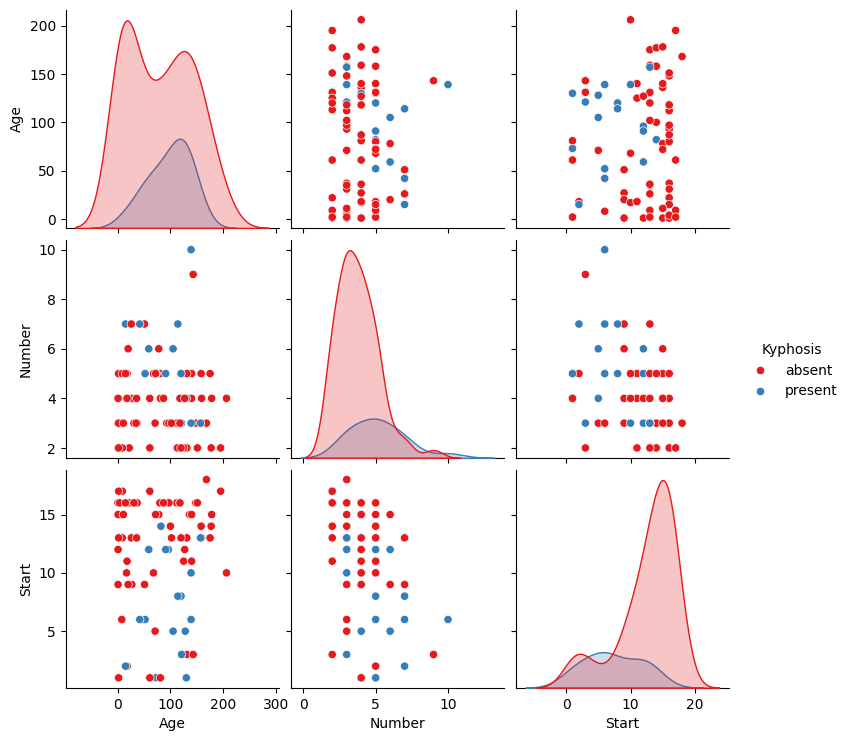

In [ ]:
sns.pairplot(df, hue='Kyphosis', palette='Set1')

Analisando os dados podemos notar que é possível obter um certo grau de separação entre eles, no entanto, deve-se reconhecer que para o modelo de **Random Forest** (que separa os dados através de linhas) será difícil obter essa separação com alto grau de precisão, sobretudo para a classe **present** pois alguns dados dessa classe estão misturados com a classe **absent**.

### Divisão treino-teste
Vamos divir os dados em um conjunto de treino e outro de teste.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.iloc[:,-3:] # nossas variáveis de predição
y = df.iloc[:,:1] # nossa variável alvo

In [ ]:
y

,Kyphosis
0,absent
1,absent
2,present
3,absent
4,absent
...,...
76,present
77,absent
78,absent
79,present


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Árvores de decisão

Começaremos apenas treinando uma única árvore de decisão. Para isso vamor importar a classe **DecisionTreeClassifier** para implementar um algoritmo de "Árvore de Decisão"

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Instanciando o classificador
clf = DecisionTreeClassifier()

# Treinando o modelo
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Agora vamos obter avaliações sobre nossa Árvore de Decisão

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# gerando um relatório
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.79      0.79      0.79        19
     present       0.33      0.33      0.33         6

    accuracy                           0.68        25
   macro avg       0.56      0.56      0.56        25
weighted avg       0.68      0.68      0.68        25



A acurácia do modelo é de 0.68, o que significa que o modelo prevê corretamente a classe (seja ‘absent’ ou ‘present’) 68% das vezes.

In [ ]:
# gerando a matriz de confusão
print(confusion_matrix(y_test, predictions))

[[15  4]
 [ 4  2]]


## Visualização de árvore

O Scikit learn possui alguns recursos de visualização incorporados para árvores de decisão. Provavelmente você não usará isso com frequência.
Para utilizarmos estes recursos iremos instalar a biblioteca **pydot** e a **six**.
No ambiente virtual do Jupyter ou do GoogleColab podemos fazer essa instalação da seguinte maneira:


In [ ]:
!pip install pydot

In [ ]:
!pip install six

Agora vamos importar as bibliotecas necessárias para a visualização.

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

#lista das características (colunas) do df, excluindo a primeira coluna
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

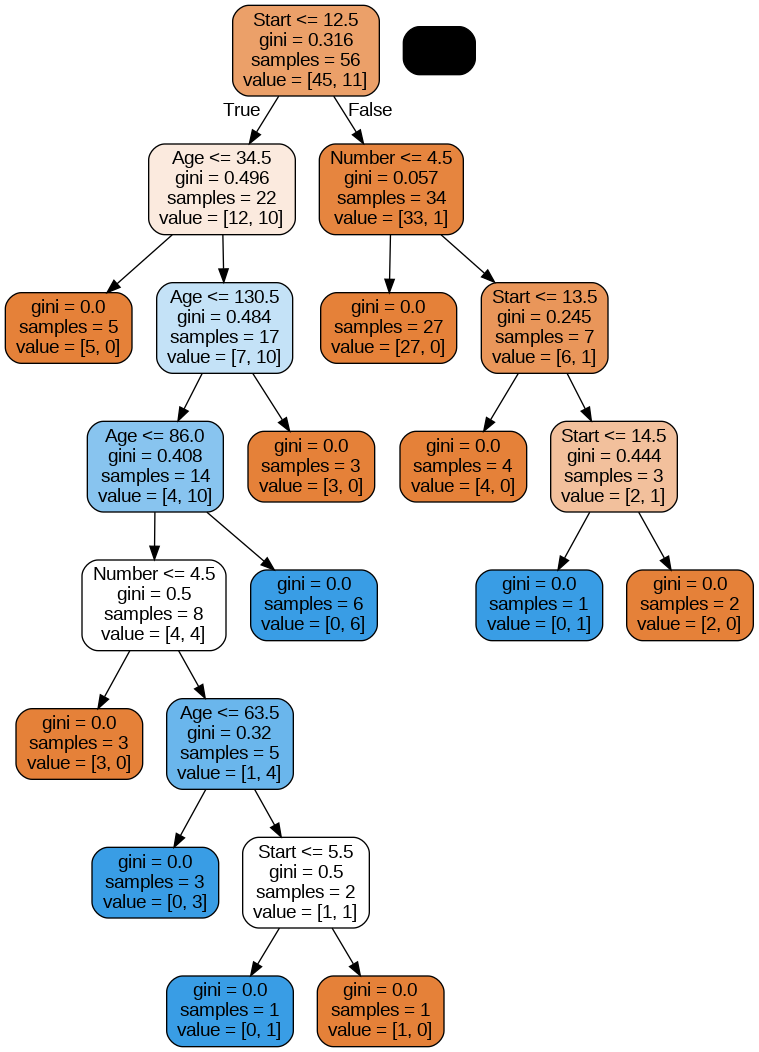

In [ ]:
# vamos usar um objeto StringIO para leitura e gravação em uma string na memória.
dot_data = StringIO()

# vamos exportar a árvore de decisão no formato Graphviz para o nosso objeto dor_data
export_graphviz(clf, out_file=dot_data,feature_names=features,filled=True,rounded=True)

# criar um gráfico a partir dos dados em dot_data
graph = pydot.graph_from_dot_data(dot_data.getvalue())

# criando uma imagem PNG do gráfico e exibindo-a
Image(graph[0].create_png())

## Random Forest (Florestas Aleatórias)

Agora vamos criar um modelo de **Random Forest** para fazer uma comparação com a **Ávore de decisão**.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators=100)
model_rfc.fit(X_train, y_train)

<ipython-input-47-0db88b7a9b20>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rfc.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
model_rfc_pred = model_rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,model_rfc_pred))

[[18  1]
 [ 5  1]]


In [ ]:
print(classification_report(y_test,model_rfc_pred))

              precision    recall  f1-score   support

      absent       0.78      0.95      0.86        19
     present       0.50      0.17      0.25         6

    accuracy                           0.76        25
   macro avg       0.64      0.56      0.55        25
weighted avg       0.71      0.76      0.71        25



Comparado ao modelo de **Árvores de Decisão**, o modelo de **Florestas Aleatórias** tem uma melhor acurácia geral (0.76 vs 0.68). No entanto, o desempenho na classe ‘present’ ainda é baixo, principalmente em termos de recall (0.17). Isso indica que o modelo está tendo dificuldades em identificar corretamente a classe ‘present’.
Como visto anteriormente no pairlot, a sobreposição da classe **present** pode afetar significativamente a performance do modelo de Florestas Aleatórias.